In [185]:
from PIL import Image
import pytesseract
import nltk
import re
import pymorphy2
from string import punctuation

In [186]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adovd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [187]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\tesseract\tesseract.exe' #link for tesseract (where did you download .exe)

In [188]:
def parse_fullname(data = None):
    
    solid_data=data.copy()
    
    prob_thresh = 0.5   #the minimum probability of a word belonging to a name
    
    sample_of_names=[]
    
    prob_fnames=[]
    
    
    morph = pymorphy2.MorphAnalyzer()
    
    if data == None:
        
        return 'Data is empty'

    #Find words similar to the names
    
    for row in data:
        
        tmp_fnames=[]
        
        for word in nltk.word_tokenize(' '.join(row)):
            
            for p in morph.parse(word):
                
                if 'Name' in p.tag and p.score >= prob_thresh:
                    
                    tmp_fnames.append([word, p.score])  #we define words similar to names
                    
                    
        sample_of_names.append(tmp_fnames)
        
        
    for idx,row in enumerate(sample_of_names):
        
        tmp=[]
        
        
        if row==[]:
            
            prob_fnames.append(solid_data[idx])         #if we couldn't parse the full name
            
        
        for word in row:
            
                
            tmp.append([solid_data[idx][solid_data[idx].index(word[0])-1],word[0],solid_data[idx][solid_data[idx].index(word[0])+1]])         #if there are options to parse the full name
            
            
            
        prob_fnames.append(tmp)
    
    
    
    
    
    return prob_fnames
            
            
            


In [189]:
images = [str(idx) + '.jpeg' for idx in range(0,10)]

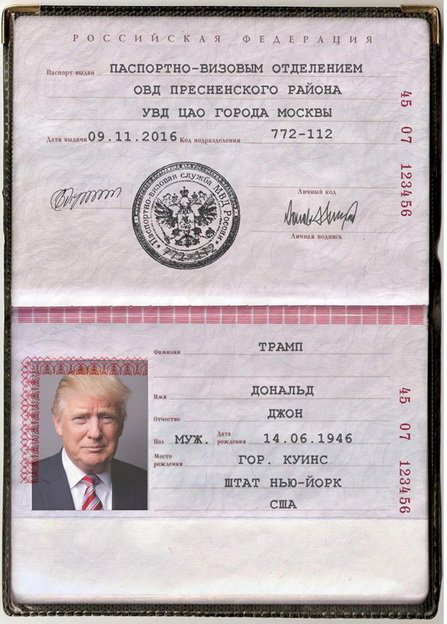

In [190]:
Image.open(images[0])

In [191]:
data = list()
r = re.compile(r'[\s{}]+'.format(re.escape(punctuation)))

for image in images:
    
    sequence_of_text = pytesseract.image_to_string(Image.open(image), lang='rus').lower() #conversion from scan to text data
    
    sequence_of_text = r.split(sequence_of_text)  #delete and divide by punctuation
    
    data.append(sequence_of_text)

In [192]:
data_from_img=parse_fullname(data)

In [193]:
for _,img in enumerate(data_from_img):
    
    for idx,variant in enumerate(img):
        
        print(f'For {_} image, {idx} variant',variant, end='\n')
        
    print('\n')

For 0 image, 0 variant ['трамп', 'дональд', 'джон']
For 0 image, 1 variant ['дональд', 'джон', '14']
For 0 image, 2 variant ['гор', 'куинс', 'штат']


For 1 image, 0 variant ['халабудина', 'юлия', 'алексеевна']


For 2 image, 0 variant ['128', 'дин', 'е']
For 2 image, 1 variant ['шапошникова', 'виктория', 'николаевна']
For 2 image, 2 variant ['9та11', 'соп', '']
For 2 image, 3 variant ['9та11', 'соп', '']


For 3 image, 0 variant ['вылаи', 'ая', 'фелерения']


For 4 image, 0 variant ['горсанкт', 'пете', '7']
For 4 image, 1 variant ['горсанкт', 'пете', '7']


For 5 image, 0 variant осх
For 5 image, 1 variant ийскля
For 5 image, 2 variant федерация
For 5 image, 3 variant отделение
For 5 image, 4 variant уфмс
For 5 image, 5 variant россии
For 5 image, 6 variant по
For 5 image, 7 variant псковской
For 5 image, 8 variant области
For 5 image, 9 variant в
For 5 image, 10 variant пыталовском
For 5 image, 11 variant районе
For 5 image, 12 variant 30
For 5 image, 13 variant 06
For 5 image, 14 va